# **Matplotlib Week 6**

# **Matplotlib 12 : Twin Axes**

# Import modules

In [1]:
# Magic command
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Cek versi
print(matplotlib.__version__)
print(np.__version__)

3.2.2
1.21.6


# Kasus Twin Axes 1
- Fungsi linespace() membuat deret bilangan dengan parameter (min, max, jumlah).
- Sumbu x pada plot mengindikasikan exponential dan sumbu y mengindikasikan logaritma.
- Plotting kali ini menggunakan oostyle (menggunakan subplots()).
- Sumbu Y pada ax1 menggunakan exponential terhadap nilai x.
- Sumbu Y pada ax2 menggunakan logaritma terhadap nilai x.
- Fungsi twinx(0 akan menghasilkan axes baru yang ditempatkan diatas axes sebelumnya.
- Karena ada 2 axes kita hanya bisa memberi judul dan legend pada figur.
Lokasi legend bisa diatur, seperti upper left, lower left, etc.

In [3]:
x = np.linspace(1, 10, 25)
x

array([ 1.   ,  1.375,  1.75 ,  2.125,  2.5  ,  2.875,  3.25 ,  3.625,
        4.   ,  4.375,  4.75 ,  5.125,  5.5  ,  5.875,  6.25 ,  6.625,
        7.   ,  7.375,  7.75 ,  8.125,  8.5  ,  8.875,  9.25 ,  9.625,
       10.   ])

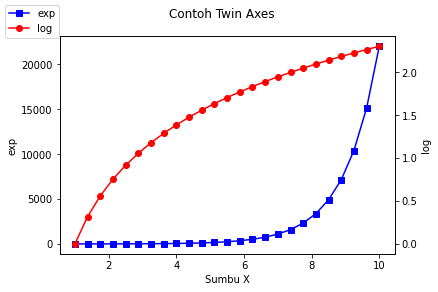

In [4]:
fig, ax1 = plt.subplots()

ax1.plot(x, np.exp(x), 'bs-', label='exp') # blue-square-dash/line
ax1.set_xlabel('Sumbu X')
ax1.set_ylabel('exp')

ax2 = ax1.twinx()
ax2.plot(x, np.log(x), 'ro-', label='log') # red-dot-dash/line
ax2.set_ylabel('log')

fig.suptitle('Contoh Twin Axes') # super-title
fig.legend(loc='upper left')

plt.show()

# Kasus Twin Axes 2
- Fungsi randint() membuat deret bilangan dengan parameter (min, max, jumlah).
- Sumbu x pada plot mengindikasikan hari dan sumbu y mengindikasikan suhu.
- Plotting kali ini menggunakan oostyle (menggunakan subplots()).
- Sumbu Y1 digunakan untuk menampung nilai sumbu terkecil dari axes pertama
- Sumbu Y2 digunakan untuk menampung nilai sumbu terbesar dari axes pertama
- Fungsi twinx(0 akan menghasilkan axes baru yang ditempatkan diatas axes sebelumnya.
- Karena ada 2 axes kita hanya bisa memberi judul pada figur.

In [5]:
x = np.random.randint(16, 40, size=30)
x

array([25, 22, 22, 31, 39, 30, 23, 31, 27, 24, 25, 31, 23, 17, 33, 28, 32,
       35, 36, 16, 25, 17, 19, 38, 28, 33, 21, 21, 20, 31])

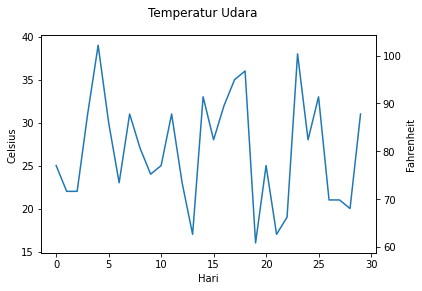

In [6]:
# Fungsi mengubah Celcius menjadi Fahrenheit
def C2F(celsius=0):
    return (celsius * 1.8) + 32

# Fungsi konversi matrix sumbu Y1 menjadi sumbu Y2
def konversi_sumbu(ax1): 
    y1, y2 = ax1.get_ylim() 
    ax2.set_ylim(C2F(y1), C2F(y2)) # mengubah C menjadi F
    ax2.figure.canvas.draw() # menggambar ulang pada figur

fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 

# sinkronisasi sumbu Y ax1 dan sumbu Y ax2
ax1.callbacks.connect('ylim_changed', konversi_sumbu) 
ax1.plot(x) 

ax1.set_xlabel('Hari')
ax1.set_ylabel('Celsius') 
ax2.set_ylabel('Fahrenheit') 

fig.suptitle('Temperatur Udara') 
plt.show() 